In [1]:
import pymolzilla.processing as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
  


import numdifftools as nd

In [2]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [12]:
f = pm.cofe_room_t()
f.df.drop(7,inplace=True)
f.load()
f.preprocess()
f.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


In [29]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


In [34]:
for ff in f:
    print(ff.fit_anisotropy.results.x)

[-0.65658877 -1.80991273 -4.18112314  1.10526313]
[ 2.37045166 -3.65728936 -3.84999323  0.89897399]
[ 2.81027739 -3.35295872 -3.99329563  0.86902874]
[ 2.78026991 -3.29513344 -4.01119824  0.8925873 ]
[ 2.85736073 -3.47460987 -3.98123045  0.87310308]
[ 2.99436183 -3.62410899 -3.99837316  0.85640948]
[ 2.65322756 -3.17214915 -3.90864194  0.91465637]
[ 2.51152853 -2.93081971 -3.95947577  0.91212154]
[ 2.96677138 -3.47964089 -3.96594922  0.89427202]


In [132]:
ex1 = [1.7*2,3.7*2]
ey1 = [-4.4*2,-2.4*2]

x1 = np.linspace(*ex1,20)
y1 = np.linspace(*ey1,20)
xx1, yy1 = np.meshgrid(x1, y1)

ex2 = [-4.3*8, -3.6*8]
ey2 = [0.6*8, 1.3*8]

x2 = np.linspace(*ex2,20)
y2 = np.linspace(*ey2,20)
xx2, yy2 = np.meshgrid(x2, y2)

In [133]:
def g1(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])
def g2(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([k[0],k[1],x/8,y/8])

In [134]:
def pl1(num, ax, ax2=None):
    ssr = f[num].fit_anisotropy.obj(f[num].fit_anisotropy.results.x)
    dof = 25
    level = ssr*(1+4./dof)
    zz1 = np.vectorize(g1)(xx1,yy1,num)
    ax.contour(xx1,yy1,zz1, levels=[level], colors='C'+str(i))
    if ax2 is not None:
        ax2.imshow(zz1, origin='lower', extent=ex1+ey1)
        
def pl2(num, ax, ax2=None):
    ssr = f[num].fit_anisotropy.obj(f[num].fit_anisotropy.results.x)
    dof = 25
    level = ssr*(1+4./dof)
    zz2 = np.vectorize(g2)(xx2,yy2,num)
    ax.contour(xx2,yy2,zz2, levels=[level], colors='C'+str(i))
    if ax2 is not None:
        ax2.imshow(zz2, origin='lower', extent=ex2+ey2)

0


/tmp/ipykernel_34052/1464778461.py:15: UserWarning: No contour levels were found within the data range.
  ax.contour(xx2,yy2,zz2, levels=[level], colors='C'+str(i))


1
2
3
4
5
6
7
8


/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


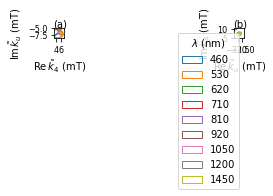

In [136]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(5,2))
arts=[]
labels=[]
for i in range(9):
    print(i)
    pl1(i, ax1)
    pl2(i, ax2)
    arts+=[patches.Ellipse((0,0),1,1,fill=False,edgecolor='C'+str(i))]
    labels+=[str(f.df['wavelength'].iloc[i])]
ax1.set_aspect(1)
ax2.set_aspect(1)


ax2.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
ax1.set_xlabel(r"$\operatorname{Re} \tilde{k}_4$ (mT)")
ax1.set_ylabel(r"$\operatorname{Im} \tilde{k}_u$ (mT)")
ax2.set_ylabel(r"$\operatorname{Im} \tilde{k}_4$ (mT)")

ax2.legend(arts,labels,title=r'$\lambda$ (nm)')

ax1.text(-0.1, 1.08, "(a)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(b)", transform=ax2.transAxes)

fig.savefig('out/cofe-anizotropie.pdf')